### Submission: 
Submit your assignment in GITHUB Repository in the form of .ipynb (code must merged to the main branch) Include code, visualization and explanation of each task. 

You can follow these initial steps:
•	Create a GITHUB repository
•	Add your team member as collaborators.
•	Create your separate branch from main.


### Assignment: Analyzing Stock Data

### Background:
You have been provided with a dataset containing historical stock price data for a company. 
Your task is to perform various data analysis tasks using Pandas, NumPy, and Matplotlib to gain insights into the stock's performance.

Dataset: You can use any stock price dataset or create a synthetic dataset for this assignment. The dataset should contain at least the following columns:

Date (representing the trading dates)
Open (the opening price of the stock on that date)
Close (the closing price of the stock on that date)
High (the highest price of the stock during the trading session)
Low (the lowest price of the stock during the trading session)
Volume (the trading volume of the stock on that date)
You can use libraries like yfinance to fetch real stock data or create a synthetic dataset using NumPy.

Tasks:

#### Data Loading and Inspection:
Load the stock price dataset into a Pandas DataFrame.
Display the first 5 rows of the DataFrame.
Check for missing values and handle them if necessary.

#### Data Exploration:
Calculate and display basic statistics (mean, median, standard deviation) for the 'Close' price.
Create a line plot of the 'Close' price over time (use Date on the x-axis).


#### Data Analysis:
Calculate and visualize the moving average of the stock's 'Close' price over a specific window (e.g., 30 days).
Identify and visualize any significant price changes or trends in the stock.
Volume Analysis

#### Analyze the trading volume of the stock:
Calculate the average daily trading volume.
Visualize the trading volume over time.

#### Financial Metrics:
Calculate daily returns for the stock.
Calculate and visualize the cumulative returns of the stock over time.
Calculate and visualize the rolling standard deviation of the daily returns.

#### Correlation Analysis:
Calculate the correlation between the stock's returns and the returns of a market index (e.g., S&P 500).
Visualize the correlation using a scatter plot.

#### Conclusion:
Summarize your findings from the analysis.
Provide insights into the stock's performance and any trends or patterns you observed.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
symbol = 'AAPL'
stock_data = yf.download(symbol, start='2021-01-01', end='2023-10-01')

[*********************100%%**********************]  1 of 1 completed


In [22]:
print(stock_data.head())

                  Open        High         Low       Close     Volume
Date                                                                 
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200
2021-01-08  132.429993  132.630005  130.229996  132.050003  105158200
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [4]:
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
stock_data['Close'].describe().T

count    690.000000
mean     153.475101
std       18.499191
min      116.360001
25%      140.157497
50%      150.674995
75%      168.470005
max      196.449997
Name: Close, dtype: float64

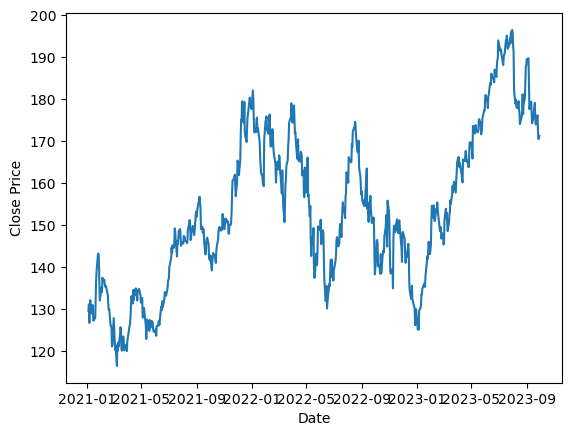

In [23]:
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [24]:
stock_data['Close'].rolling(window=30).mean()

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
                 ...    
2023-09-25    178.891334
2023-09-26    178.641334
2023-09-27    178.407333
2023-09-28    178.211333
2023-09-29    178.118333
Name: Close, Length: 690, dtype: float64

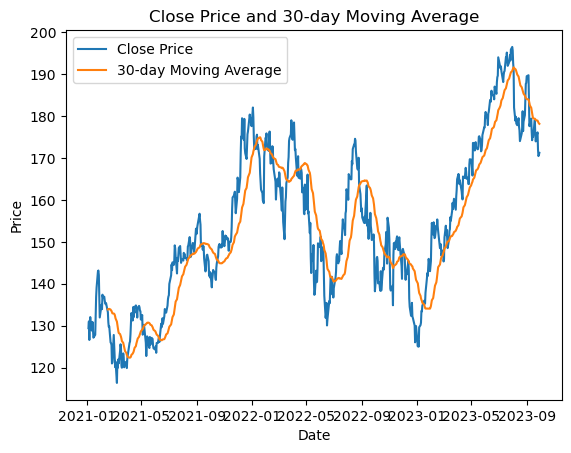

In [26]:
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['Close'].rolling(window=30).mean(), label='30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-day Moving Average'.format(symbol))
plt.legend()
plt.show()

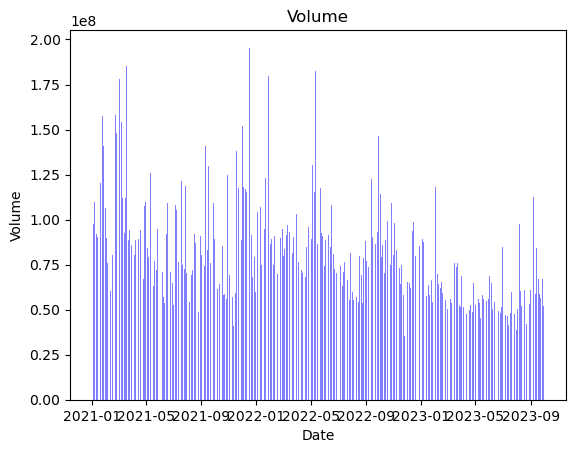

In [27]:
plt.bar(stock_data.index, stock_data['Volume'], color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume'.format(symbol))
plt.show()

Average Daily Trading Volume: 81662155.51


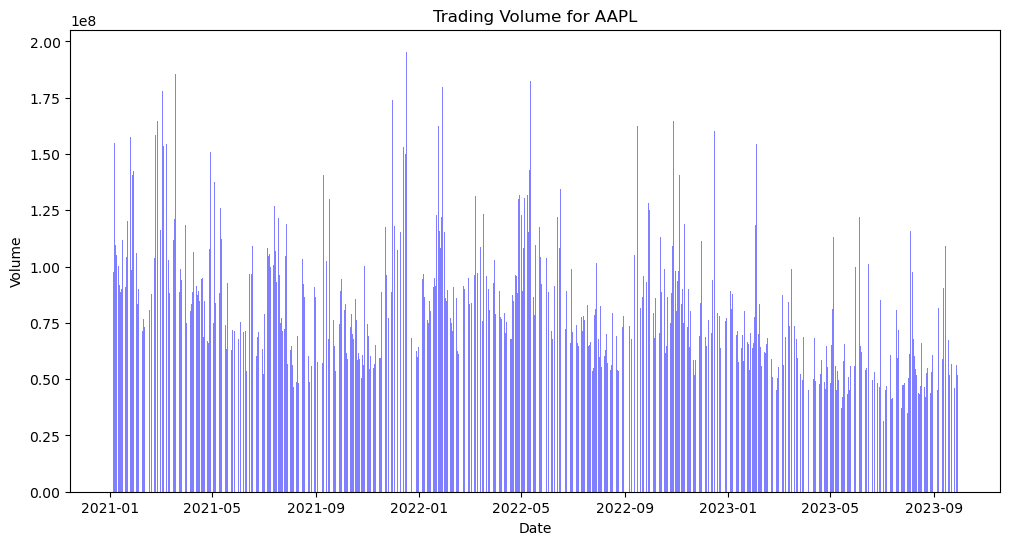

In [28]:
average_daily_volume = stock_data['Volume'].mean()

print("Average Daily Trading Volume: {:.2f}".format(average_daily_volume))

plt.figure(figsize=(12, 6))
plt.bar(stock_data.index, stock_data['Volume'], color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume for {}'.format(symbol))
plt.show()

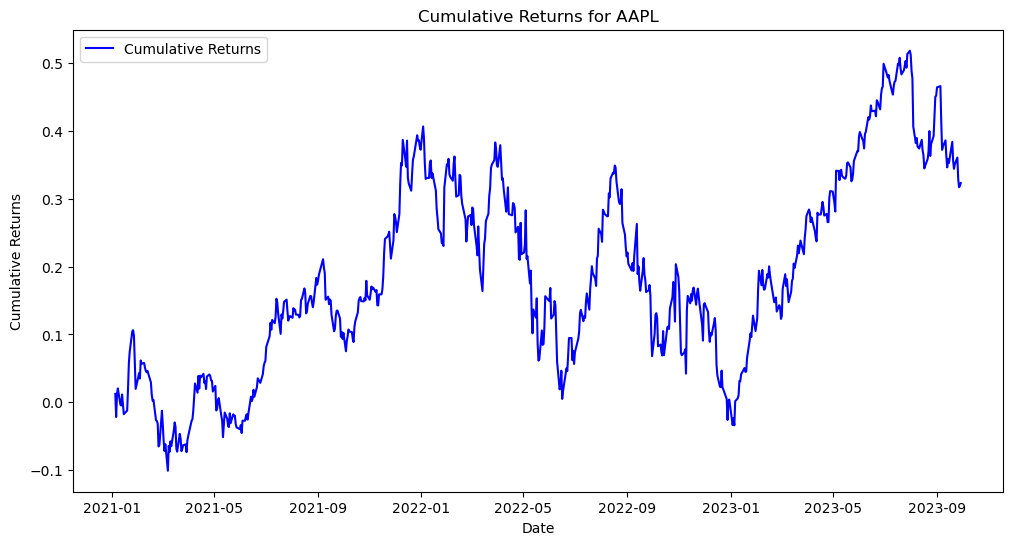

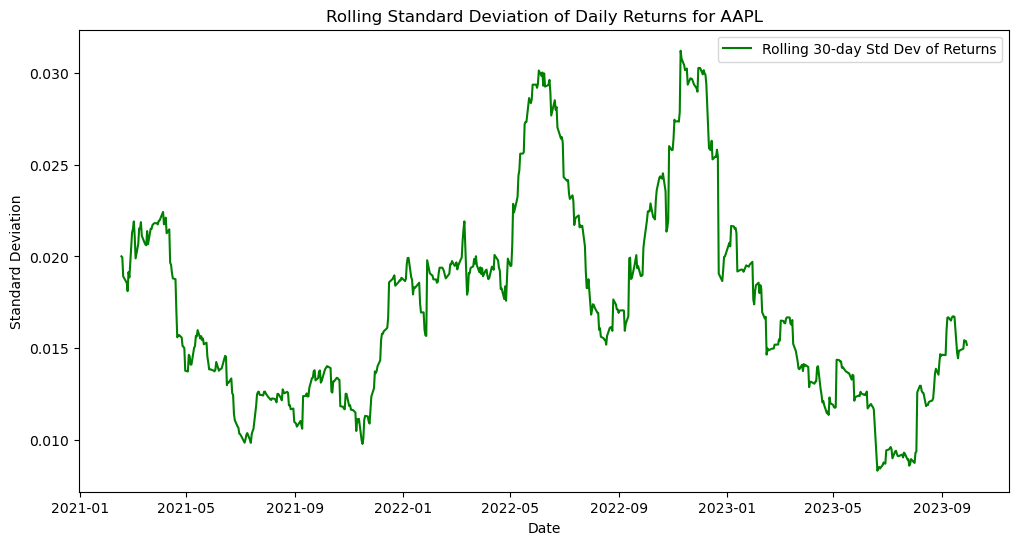

In [29]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod() - 1

rolling_std = stock_data['Daily_Return'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Cumulative_Return'], label='Cumulative Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns for {}'.format(symbol))
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, rolling_std, label='Rolling 30-day Std Dev of Returns', color='green')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation of Daily Returns for {}'.format(symbol))
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Correlation between Stock's Returns and S&P 500 Returns: 0.8107527222683959


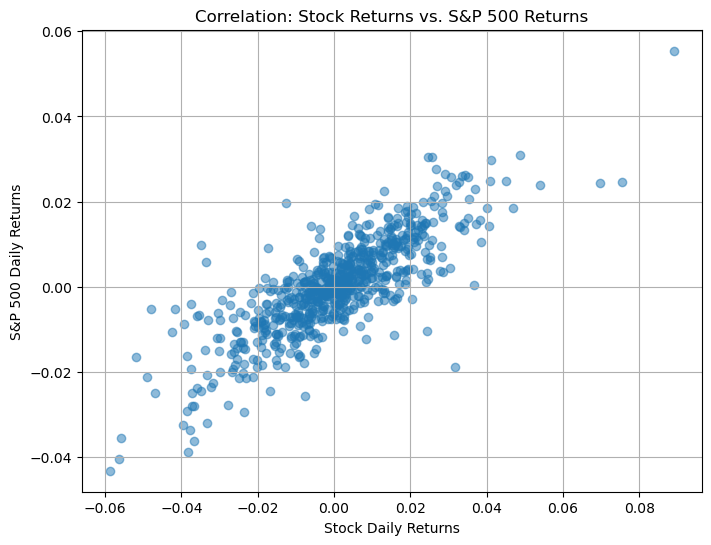

In [30]:
sp500_data = yf.download('^GSPC', start='2021-01-01', end='2023-10-01')

# Calculate daily returns for both the stock and the S&P 500
stock_data['Stock_Daily_Return'] = stock_data['Close'].pct_change()
sp500_data['SP500_Daily_Return'] = sp500_data['Close'].pct_change()

# Merge the two DataFrames based on the date
merged_data = pd.merge(stock_data, sp500_data, on='Date')

# Calculate the correlation between the stock's returns and the S&P 500 returns
correlation = merged_data['Stock_Daily_Return'].corr(merged_data['SP500_Daily_Return'])

# Print the correlation
print("Correlation between Stock's Returns and S&P 500 Returns:", correlation)

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Stock_Daily_Return'], merged_data['SP500_Daily_Return'], alpha=0.5)
plt.xlabel('Stock Daily Returns')
plt.ylabel('S&P 500 Daily Returns')
plt.title('Correlation: Stock Returns vs. S&P 500 Returns')
plt.grid(True)
plt.show()

Conclusion

There are no null values in the stock data from start date ='2021-01-01' to end date ='2023-10-01'.
The Average Daily Trading Volume is 81662155.51.
Correlation between Stock's Returns and S&P 500 Returns: 0.8107527222683959